In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
datapath = Path("./data/battery/")

In [3]:
train_df = pd.read_csv(datapath / "train.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      50000 non-null  object 
 1   V0      39951 non-null  float64
 2   V1      40013 non-null  float64
 3   V2      40159 non-null  float64
 4   V3      39836 non-null  float64
 5   V4      40053 non-null  float64
 6   V5      40062 non-null  float64
 7   V6      39990 non-null  float64
 8   V7      39974 non-null  float64
 9   Class   50000 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 3.8+ MB


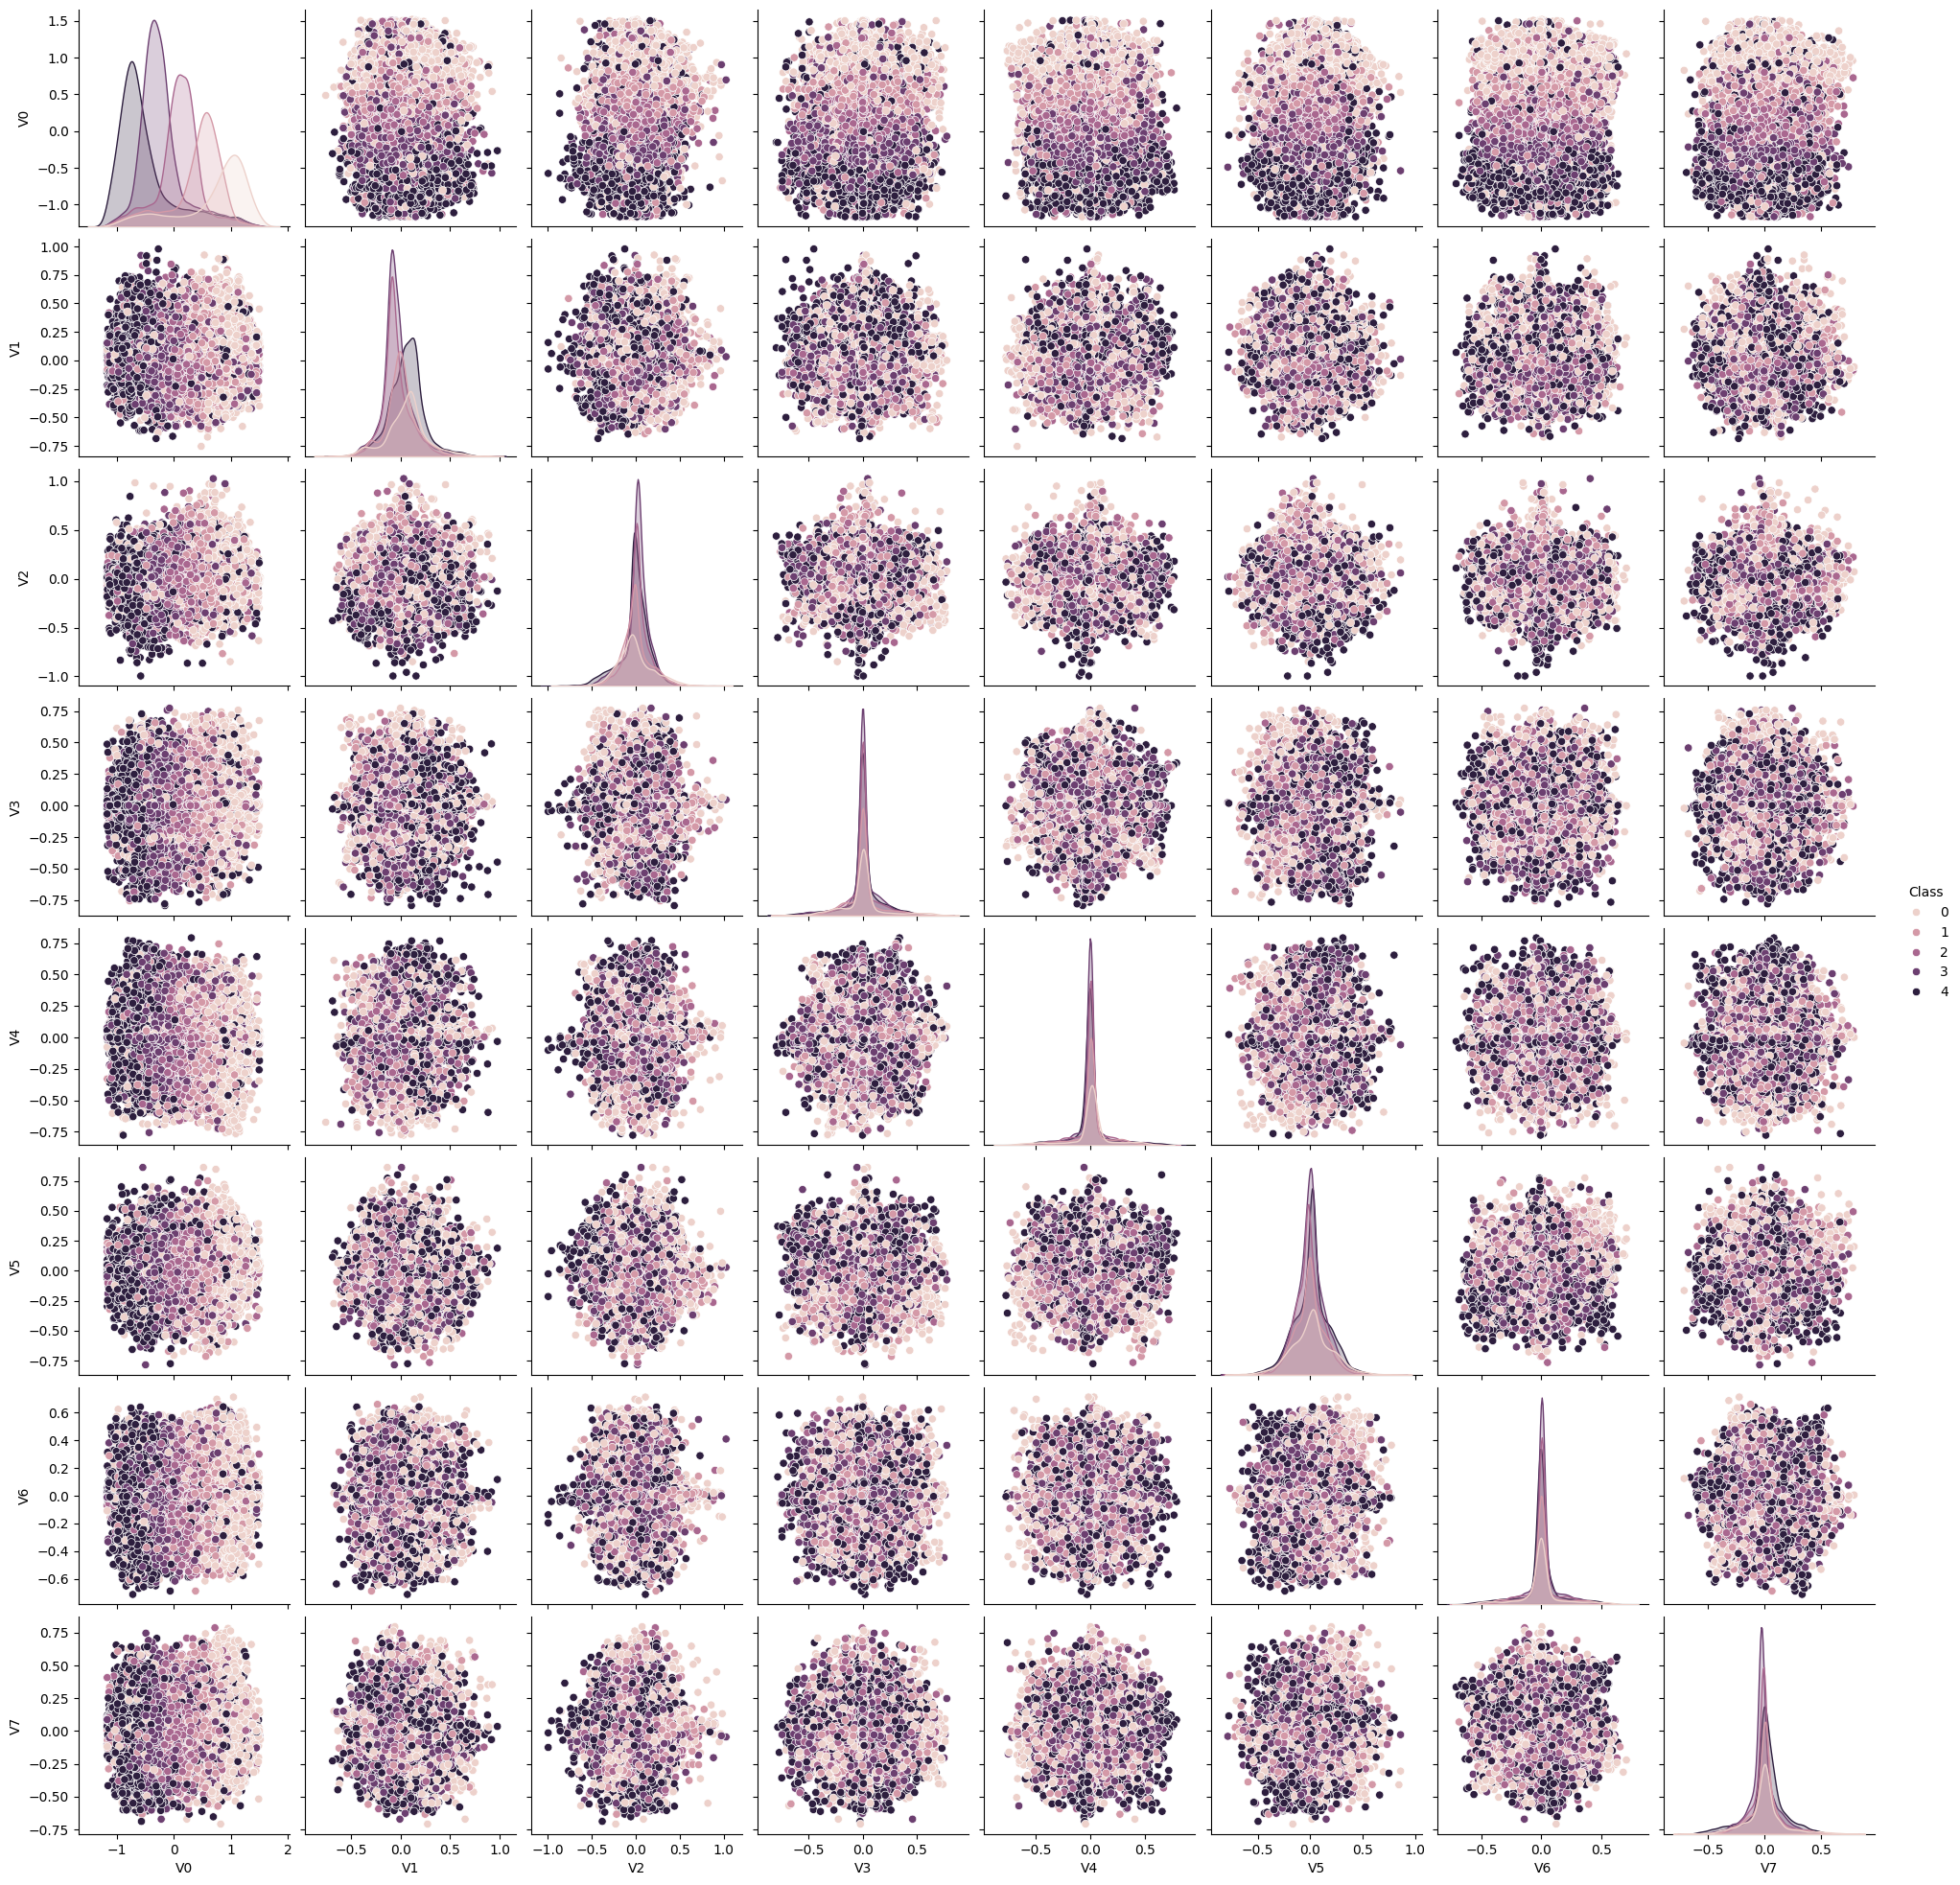

In [6]:
sns.pairplot(train_df, hue="Class")

In [7]:
test_df = pd.read_csv(datapath / "test.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      50000 non-null  object 
 1   V0      40135 non-null  float64
 2   V1      39993 non-null  float64
 3   V2      40007 non-null  float64
 4   V3      39950 non-null  float64
 5   V4      39963 non-null  float64
 6   V5      40144 non-null  float64
 7   V6      39957 non-null  float64
 8   V7      39870 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.4+ MB


# 데이터 처리
## 데이터 분류 : 연속/카테고리
## 데이터 결측치
## 스케일링/onehot

In [13]:
round(train_df.isna().mean(), 3)

ID       0.000
V0       0.201
V1       0.200
V2       0.197
V3       0.203
V4       0.199
V5       0.199
V6       0.200
V7       0.201
Class    0.000
dtype: float64

In [15]:
train_df.columns

Index(['ID', 'V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'Class'], dtype='object')

In [16]:
train_df.mean(numeric_only=True)

V0      -0.002170
V1       0.001493
V2      -0.000191
V3       0.000611
V4       0.000455
V5       0.000572
V6      -0.000358
V7       0.000817
Class    2.313260
dtype: float64

In [17]:
train_df["Class"].value_counts()

Class
3    13101
4    11845
2    10358
1     8264
0     6432
Name: count, dtype: int64

In [50]:
# train_df2 = train_df.loc[train_df["V0"].isna(), "V0"] = train_df["V0"].mean()
# Series이기 때문에 Index를 참조해서 평균값으로 채움
train_df2 = train_df.fillna(value=train_df.mean(numeric_only=True))
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      50000 non-null  object 
 1   V0      50000 non-null  float64
 2   V1      50000 non-null  float64
 3   V2      50000 non-null  float64
 4   V3      50000 non-null  float64
 5   V4      50000 non-null  float64
 6   V5      50000 non-null  float64
 7   V6      50000 non-null  float64
 8   V7      50000 non-null  float64
 9   Class   50000 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 3.8+ MB


In [51]:
# train 데이터의 평균으로 test 데이터 채움
test_df2 = test_df.fillna(value=train_df.mean(numeric_only=True))
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      50000 non-null  object 
 1   V0      50000 non-null  float64
 2   V1      50000 non-null  float64
 3   V2      50000 non-null  float64
 4   V3      50000 non-null  float64
 5   V4      50000 non-null  float64
 6   V5      50000 non-null  float64
 7   V6      50000 non-null  float64
 8   V7      50000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.4+ MB


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
train_df2.columns

Index(['ID', 'V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'Class'], dtype='object')

In [54]:
num_features = list(train_df2.columns[1:-1])
num_features

['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']

In [55]:
sc = StandardScaler()
X = sc.fit_transform(train_df2[num_features])
y = train_df2["Class"]
test_x = sc.transform(test_df2[num_features])

In [56]:
X.shape, y.shape

((50000, 8), (50000,))

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [58]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
train_x.shape, train_y.shape

((35000, 8), (35000,))

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
param_grid = {"max_depth": [3, 10, 15], "min_samples_leaf": [10, 20]}
grid = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid=param_grid, cv=5)
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [3, 10, 15],
                         'min_samples_leaf': [10, 20]})

In [79]:
grid.score(valid_x, valid_y)

0.6209333333333333

In [80]:
grid.score(train_x, train_y)

0.7130571428571428

In [81]:
grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 10}

In [82]:
submit = test_df[["ID"]].copy()
submit["Class"] = grid.predict(test_x)
submit.to_csv(datapath / "submissions.csv", index=False)